# WHY Ensemble ?  

Ensembles are a powerful concept in ML, able to take multiple individual models, each one performing well in some subspace, and combine them in such a way that the overall model is (somehow, and ideally) best in all subspaces. Yet they are woefully underutilized in data science. The reason is because most data scientists are either (a) untrained in their use, or more importantly, (b) decide implicitly that the cost of using an ensemble is not worth the gain in performance, compared to the energy needed to just “train a better model”. There is nothing fundamental about this choice: it’s the result of the current state of tooling in data science/machine learning.



# What is H1ST Ensemble ? 
In H1ST platform, we want to provid an easy way to use Ensemble to Data Scientist.  
You can use h1st Ensemble with h1st models that includes ML/DL models from various AI platforms such as SKLearn and Tensorflow.

# How to use H1st Ensemble ?
1. We will first define/train two h1st example models (You can use N different models with h1st Ensemble API).
2. We will import RandomForestStackEnsembleClassifier from h1st.
3. Define load_data and prep_data methods of RandomForestStackEnsembleClassifier
4. Train and evaluate the ensemble  

In this tutorial, we will use "default of credit card clients Data Set" which has 23 features and a target (2 classes). The data set is provided by Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

In [1]:
# coding: utf-8
%load_ext autoreload
%autoreload 2

In [2]:
import os

import pandas as pd

import h1st as h1
h1.init()

from examples.Ensemble.sklearn_smv_classifier import SklearnSVMClassifier
from examples.Ensemble.tensorflow_mlp_classifier import TensorflowMLPClassifier
from examples.Ensemble import config
from examples.Ensemble.utils import prepare_train_test_data

## Submodel_1 - SVM

In [3]:
h1_sk_svm = SklearnSVMClassifier()
data = h1_sk_svm.load_data()

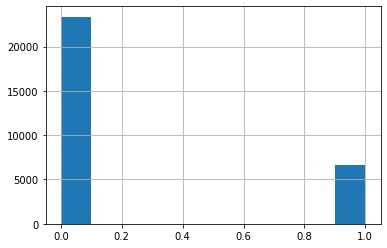

In [4]:
h1_sk_svm.explore(data)

In [5]:
prepared_data = h1_sk_svm.prep(data)

INFO:examples.Ensemble.utils:(20100, 23), (9900, 23), (20100, 1), (9900, 1)


In [6]:
h1_sk_svm.train(prepared_data)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [7]:
h1_sk_svm.evaluate(prepared_data)
h1_sk_svm.metrics

{'accuracy': 0.8143434343434344}

In [8]:
h1_sk_svm.persist('my_sk_svm')

2020-10-15 12:35:00,384 INFO h1st.model_repository.model_repository: Saving metrics property...
INFO:h1st.model_repository.model_repository:Saving metrics property...
2020-10-15 12:35:00,387 INFO h1st.model_repository.model_repository: Saving stats property...
INFO:h1st.model_repository.model_repository:Saving stats property...
2020-10-15 12:35:00,391 INFO h1st.model_repository.model_repository: Saving model property...
INFO:h1st.model_repository.model_repository:Saving model property...


'my_sk_svm'

## Submodel_2 - Multi-Layer Perceptron (MLP)

In [9]:
h1_tf_mlp = TensorflowMLPClassifier()
data = h1_tf_mlp.load_data()
prepared_data = h1_tf_mlp.prep(data)

INFO:examples.Ensemble.utils:(20100, 23), (9900, 23), (20100, 1), (9900, 1)


In [10]:
h1_tf_mlp.train(prepared_data)

In [11]:
h1_tf_mlp.evaluate(prepared_data)
h1_tf_mlp.metrics

INFO:examples.Ensemble.tensorflow_mlp_classifier:(9900, 1), (9900, 1)


{'accuracy': 0.8168686868686869}

In [12]:
h1_tf_mlp.persist('my_tf_mlp')

2020-10-15 12:35:10,180 INFO h1st.model_repository.model_repository: Saving metrics property...
INFO:h1st.model_repository.model_repository:Saving metrics property...
2020-10-15 12:35:10,183 INFO h1st.model_repository.model_repository: Saving stats property...
INFO:h1st.model_repository.model_repository:Saving stats property...
2020-10-15 12:35:10,186 INFO h1st.model_repository.model_repository: Saving model property...
INFO:h1st.model_repository.model_repository:Saving model property...


'my_tf_mlp'

## H1ST StackEnsemble

In [13]:
class RandomForestClassifierStackEnsemble(h1.RandomForestClassifierStackEnsemble):
    def load_data(self,):
        df = pd.read_excel(config.DATA_PATH, header=1)
        return df

    def prep(self, loaded_data):
        return prepare_train_test_data(loaded_data)

rf_stack_ensemble = RandomForestClassifierStackEnsemble(
    [SklearnSVMClassifier().load('my_sk_svm'), TensorflowMLPClassifier().load('my_tf_mlp')],
    # 'submodel_predict_input_key'= 'X', 'submodel_predict_output_key'='predictions') ## by default
)

2020-10-15 12:35:10,320 INFO h1st.model_repository.model_repository: Loading version my_sk_svm ....
INFO:h1st.model_repository.model_repository:Loading version my_sk_svm ....
2020-10-15 12:35:10,392 INFO h1st.model_repository.model_repository: Loading version my_tf_mlp ....
INFO:h1st.model_repository.model_repository:Loading version my_tf_mlp ....


In [14]:
data = rf_stack_ensemble.load_data()
prepared_data = rf_stack_ensemble.prep(data)

INFO:examples.Ensemble.utils:(20100, 23), (9900, 23), (20100, 1), (9900, 1)


In [15]:
rf_stack_ensemble.train(prepared_data)

In [16]:
rf_stack_ensemble.evaluate(
    prepared_data, metrics=['confusion_matrix', 'accuracy'])

In [17]:
rf_stack_ensemble.persist('my_ensemble')
rf_stack_ensemble = None

2020-10-15 12:35:34,826 INFO h1st.model_repository.model_repository: Saving metrics property...
INFO:h1st.model_repository.model_repository:Saving metrics property...
2020-10-15 12:35:34,830 INFO h1st.model_repository.model_repository: Saving stats property...
INFO:h1st.model_repository.model_repository:Saving stats property...
2020-10-15 12:35:34,832 INFO h1st.model_repository.model_repository: Saving model property...
INFO:h1st.model_repository.model_repository:Saving model property...


# Compare the accuracy of Submodels and Ensemble

In [18]:
rf_stack_ensemble = RandomForestClassifierStackEnsemble(
    [SklearnSVMClassifier().load('my_sk_svm'), TensorflowMLPClassifier().load('my_tf_mlp')]).load('my_ensemble')

2020-10-15 12:35:35,189 INFO h1st.model_repository.model_repository: Loading version my_sk_svm ....
INFO:h1st.model_repository.model_repository:Loading version my_sk_svm ....
2020-10-15 12:35:35,266 INFO h1st.model_repository.model_repository: Loading version my_tf_mlp ....
INFO:h1st.model_repository.model_repository:Loading version my_tf_mlp ....
2020-10-15 12:35:35,286 INFO h1st.model_repository.model_repository: Loading version my_ensemble ....
INFO:h1st.model_repository.model_repository:Loading version my_ensemble ....


In [19]:
sk_svm_accuracy = h1_sk_svm.metrics['accuracy']
tf_fc_accuracy = h1_tf_mlp.metrics['accuracy']
ensemble_accuracy = rf_stack_ensemble.metrics['accuracy']

In [20]:
print('sk_svm_accuracy:', sk_svm_accuracy)
print('tf_fc_accuracy:', tf_fc_accuracy)
print('ensemble_accuracy:', ensemble_accuracy)
assert (ensemble_accuracy >= sk_svm_accuracy) & (ensemble_accuracy >= tf_fc_accuracy)

sk_svm_accuracy: 0.8143434343434344
tf_fc_accuracy: 0.8168686868686869
ensemble_accuracy: 0.8185858585858586
